In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [5]:
data = pd.read_csv('Copy of Online Payment Fraud Detection.csv')

In [6]:
folds = StratifiedKFold(n_splits=10, random_state=42,shuffle=True) # cross validation algo to avoid data bias

In [7]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [8]:
class DataProcessing():
    """
        This a python class for handling Data and modelling stuffs
        varieties of methods available to call on the class's object to perform certain tasks
        arguments: data (Pd.DataFrame)
    """
    def __init__(self,df):
        self.df = df
    def heat_map(self):
        """
        This method print the heat map of the data showing null value magnitudes 
        """
        plt.figure(figsize=(15,15))
        sns.heatmap(self.df.isnull())
    def info(self):
        """
        this method prints
        """
        return self.df.info()
    def print_uniques(self, col_name):
        """"
        prints the unique strings of this column
        """
        if type(col_name) == list:
            for col in col_name:
                print(self.df[col].unique())
        else:
            print(self.df[col_name].unique())
    def corr(self):
        """
        displays the correlation heat map of the features
        """
        plt.figure(figsize=(15,15))
        sns.heatmap(self.df.corr())
        
    def encoder(self, columns):
        """
        this is to encode ordinal, normial or categorical data
        """
        le = LabelEncoder()
        for col in columns:
            self.df[col] = le.fit_transform(self.df[col])
        print('Encoding done')

    def onehot_encode(self, features):
        """
        oneHot encoding method
        parameters:
            features:List
        """
        self.df = pd.get_dummies(self.df, prefix_sep='_', columns=features)
        print('OneHot done')

    def scaler(self, columns):
        """
        this method scales the data in a particular column using the standard scaler algorithm
        parameters:
            columns: List
        """
        sc = StandardScaler()
        for col in columns:
            self.df[col] = sc.fit_transform(np.array(self.df[col])).reshape(-1,1)
        print('Done scaling')
                 
    def stat(self,column):

        """
        basic statistics of columns
        parameters:
            column: String
        """

        stat_dict = {}
        stat_dict['max'] = 'nil'
        stat_dict['min'] = 'nil'
        stat_dict['mean'] = 'nil'
        stat_dict['median'] = 'nil'
        stat_dict['mode'] = 'nil'
        stat_dict['col_name'] = column

        stat_dict['mean'] = self.df[column].mean()
        stat_dict['median'] = self.df[column].median()
        stat_dict['mode'] = self.df[column].mode()[0]
        stat_dict['max'] = self.df[column].max()
        stat_dict['min'] = self.df[column].min()

        return stat_dict

    def split_data(self, train_thres=0.5):
        """
        for splitting data into train and test set
        parameter:
            train_tres:Default=-.5 : float
        """
        if train_thres >= 0.5 and train_thres <= 1.0:
            train_length = round(len(self.df) * train_thres)
            # test_length = len(self.df) - train_length

            train = self.df[:train_length]
            test = self.df[train_length:]

            train_y = train['isFraud']
            train_x = train.drop('isFraud',1)

            self.train_y = train_y
            self.train_x = train_x

            test_y = test['isFraud']
            test_x = test.drop('isFraud',1)

            self.test_x = test_x
            self.test_y = test_y
        else:
            print('Invalid threshold')
    
    def data(self, data_type='train'):
        """
        to get data, i.e train, test
        parameter:
            data_type: string : train || test
        """
        if data_type == 'test':
            return self.test_x,self.test_y
        if data_type == 'train':
            return self.train_x, self.train_y

    # def trainer(self,x,y,model):
    #     """
    #         this is the power method for trainning the model
    #         parameters:
    #             x: independent features: Pd.Series || List || Pd.DataFrame
    #             y: dependent variable: Pd.Series || List
    #             model: training algorithm : Object
    #     """
    #     model_score = []
    #     for train_index, test_index in folds.split(x,y):
    #         start = time.time()
    #         x_train,x_test,y_train,y_test = x[train_index], x[test_index], y[train_index], y[test_index]
        
    #         model_score.append(np.sqrt(train_score(xgb_regressor, x_train,x_test,y_train,y_test)))
        
    #         # prediction = xgb_regressor.predict(testing_data[fet].values)
        
    #     pass

In [9]:
dp = DataProcessing(data)

In [10]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


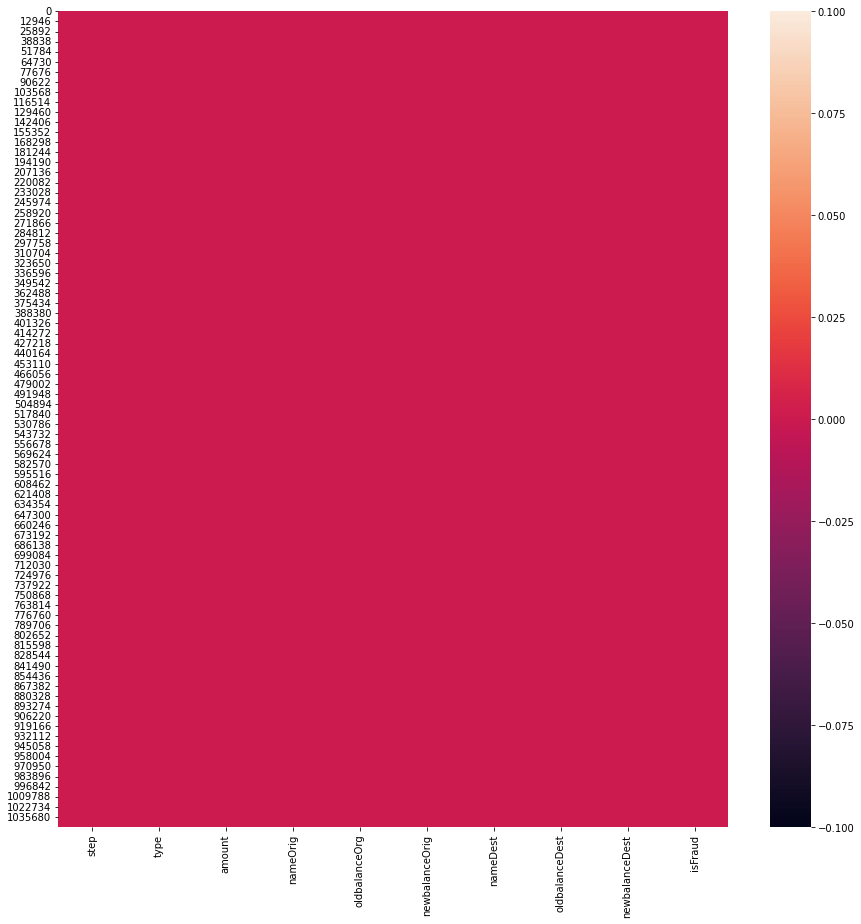

In [11]:
dp.heat_map()

In [12]:
print(dp.df.columns.to_list(), '\n')

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'] 



<AxesSubplot:ylabel='Frequency'>

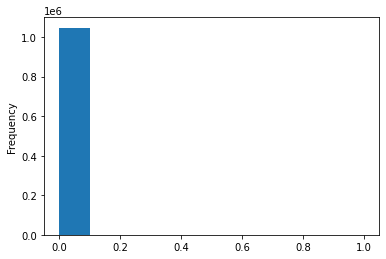

In [13]:
dp.df['isFraud'].plot(kind='hist')

In [14]:
dp.print_uniques('type') # categorical encoding will be done on this column

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [15]:
dp.print_uniques('step')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]


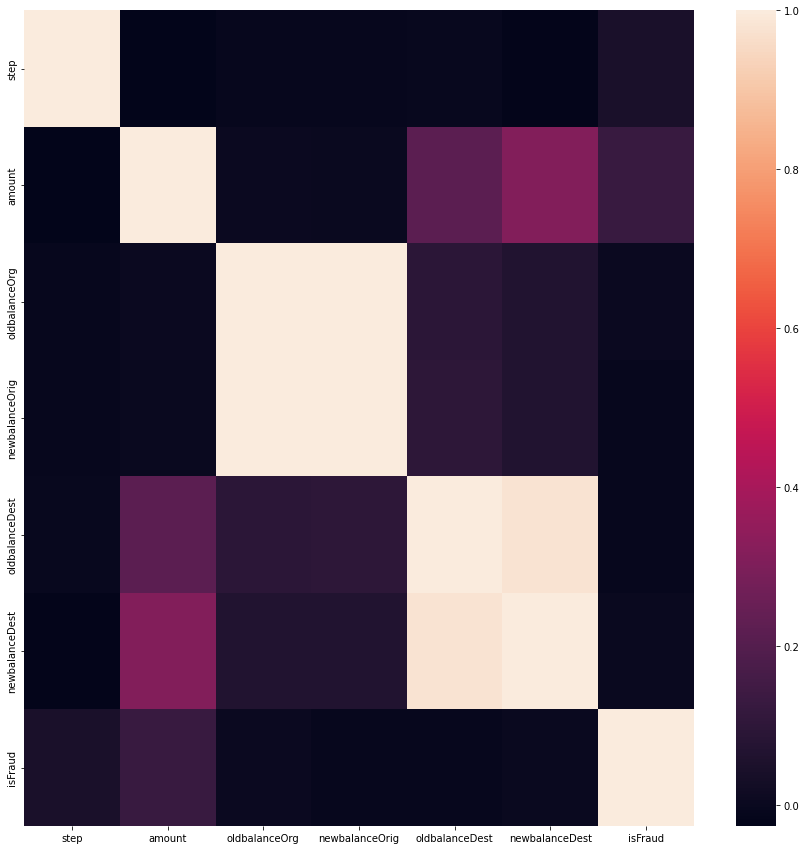

In [16]:
dp.corr()

In [17]:
dp.df['nameOrig'].value_counts() # label encoding will be done on this column

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: nameOrig, Length: 1048317, dtype: int64

In [18]:
dp.df['nameDest'].value_counts()  # label encoding

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

In [19]:
# printing columns having numerical values' stat
for col in dp.df.columns:
    if dp.df[col].dtypes == np.int64 or dp.df[col].dtypes == np.float64:
        print(dp.stat(col))

{'max': 95, 'min': 1, 'mean': 26.966174093412487, 'median': 20.0, 'mode': 19, 'col_name': 'step'}
{'max': 10000000.0, 'min': 0.1, 'mean': 158666.9755271392, 'median': 76343.33, 'mode': 10000000.0, 'col_name': 'amount'}
{'max': 38900000.0, 'min': 0.0, 'mean': 874009.544348177, 'median': 16002.0, 'mode': 0.0, 'col_name': 'oldbalanceOrg'}
{'max': 38900000.0, 'min': 0.0, 'mean': 893808.8980306699, 'median': 0.0, 'mode': 0.0, 'col_name': 'newbalanceOrig'}
{'max': 42100000.0, 'min': 0.0, 'mean': 978160.0492755122, 'median': 126377.21, 'mode': 0.0, 'col_name': 'oldbalanceDest'}
{'max': 42200000.0, 'min': 0.0, 'mean': 1114197.9684699522, 'median': 218260.36, 'mode': 0.0, 'col_name': 'newbalanceDest'}
{'max': 1, 'min': 0, 'mean': 0.0010890971079798775, 'median': 0.0, 'mode': 0, 'col_name': 'isFraud'}


In [20]:
# feature engineering
dp.df['step'] = 60*dp.df['step']

In [21]:
# feature engineering
dp.df['sender_to_receiver'] = np.abs(dp.df['oldbalanceOrg'] - dp.df['newbalanceOrig'] ) / ( ( dp.df['newbalanceDest'] - dp.df['oldbalanceDest'] ) + dp.df['amount'].min() )

In [22]:
# feature engineering
dp.df['step_amt_relation'] = (dp.df['step']/dp.df['step'].max()) * dp.df['amount']

In [23]:
le_encode_list = ['nameDest', 'nameOrig'] # list of columns to encode

In [24]:
dp.encoder(le_encode_list) # calling the encoder function

Encoding done


In [25]:
dp.onehot_encode(['type']) # calling the encoder func for onehot encoding

OneHot done


In [26]:
dp.df['sender_to_receiver'] = dp.df['sender_to_receiver'].fillna(0) # filling null fields

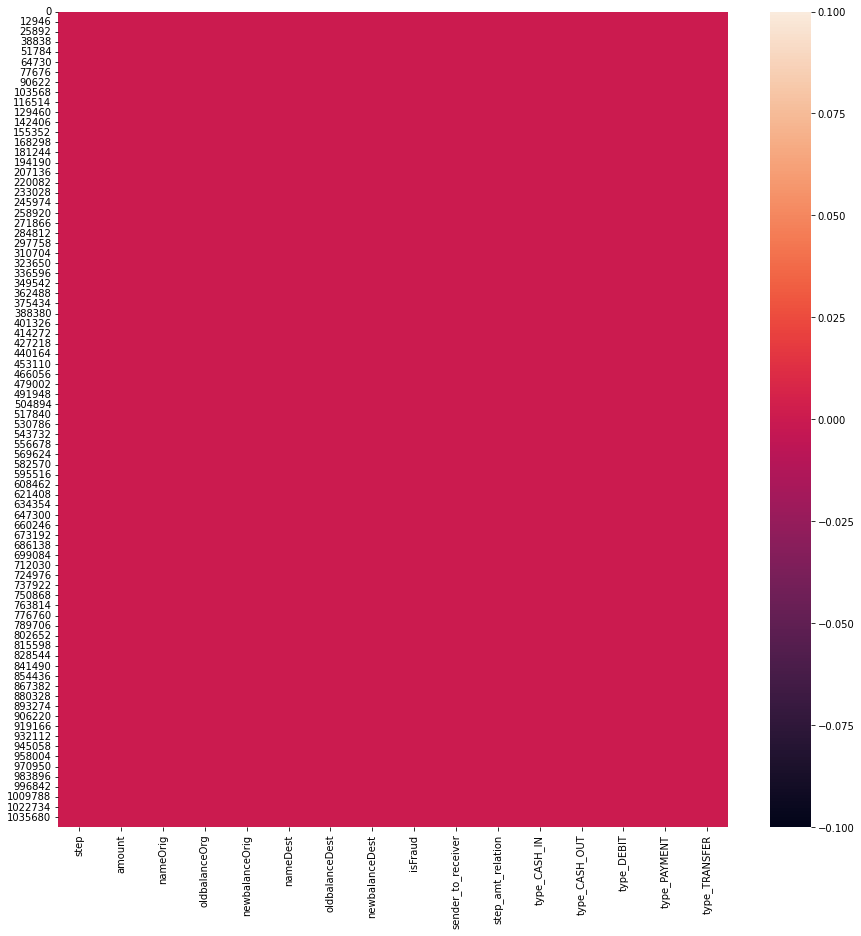

In [27]:
dp.heat_map()

In [28]:
dp.df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,sender_to_receiver,step_amt_relation,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,60,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0,98396.400000,103.575158,0,0,0,1,0
1,60,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,0,18642.800000,19.624000,0,0,0,1,0
2,60,181.00,165236,181.0,0.00,73550,0.0,0.0,1,1810.000000,1.905263,0,0,0,0,1
3,60,181.00,961662,181.0,0.00,65464,21182.0,0.0,1,-0.008545,1.905263,0,1,0,0,0
4,60,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,0,116681.400000,122.822526,0,0,0,1,0


In [29]:
dp.df['sender_to_receiver'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1048575 entries, 0 to 1048574
Series name: sender_to_receiver
Non-Null Count    Dtype  
--------------    -----  
1048575 non-null  float64
dtypes: float64(1)
memory usage: 8.0 MB


In [30]:
dp.split_data(0.65) # spliting data for 65%train

/tmp/ipykernel_16538/2128722427.py:103: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_x = train.drop('isFraud',1)
/tmp/ipykernel_16538/2128722427.py:109: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_x = test.drop('isFraud',1)


In [31]:
train_x, train_y = dp.data('train') # getting the train data

In [32]:
test_x, test_y = dp.data('test') # getting the test data

# test_y.reshape(1,-1)
# train_y.reshape(1,-1)

In [33]:
len(train_x), len(train_y)

(681574, 681574)

In [34]:
len(test_x), len(test_y)

(367001, 367001)

In [35]:
# python class to train
class Model():
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
    def ml_model(self, model):
        self.model = model
        model.fit(self.x_train, self.y_train)
        pred_train = model.predict(self.x_train)
        pred_test = model.predict(self.x_test)
        test_score = accuracy_score(self.y_test, pred_test) * 100 
        train_score = accuracy_score(self.y_train, pred_train )*100
        
        accuracy = dict()
        accuracy['Training'] = train_score
        accuracy['Testing'] = test_score
        
        return accuracy

In [36]:
# models to train
gb = GradientBoostingClassifier(n_estimators=140, random_state=160, max_depth=3, learning_rate=0.08, subsample=0.2)
lr = LogisticRegression()
xgbC = xgb.XGBClassifier(n_estimators=2100, random_state=160, subsample=0.7, reg_lambda=80, max_depth=9, learning_rate=0.05)

In [37]:
# initializing the model class
CopfdModel = Model(train_x, test_x, train_y, test_y)

In [38]:
train_x[train_x == np.inf].count()

step                  0
amount                0
nameOrig              0
oldbalanceOrg         0
newbalanceOrig        0
nameDest              0
oldbalanceDest        0
newbalanceDest        0
sender_to_receiver    0
step_amt_relation     0
type_CASH_IN          0
type_CASH_OUT         0
type_DEBIT            0
type_PAYMENT          0
type_TRANSFER         0
dtype: int64

In [39]:
CopfdModel.ml_model(lr)

/home/hameed/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Training': 99.95891862072203, 'Testing': 99.91253429827167}

In [40]:
# training gradient boosted machines
CopfdModel.ml_model(gb)

In [41]:
# training extreem gradient boosted machines
CopfdModel.ml_model(xgbC)

In [42]:
# x = train_x
# x = x.append(test_x)

# y = train_y
# y = y.append(test_y)

In [43]:
x = dp.df.drop('isFraud',1)
y = dp.df['isFraud']

/tmp/ipykernel_16538/2789390459.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = dp.df.drop('isFraud',1)


In [53]:
# performing cross validation with kfold
score_xgb = list()
score_gb = list()
score_lr = list()


for train_index, test_index in folds.split(x,y):
    x_train,x_test,y_train,y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    CopfdModel_cv = Model(x_train, x_test, y_train, y_test)
    score_gb.append(CopfdModel_cv.ml_model(gb))
    score_lr.append(CopfdModel_cv.ml_model(lr))
    score_xgb.append(CopfdModel_cv.ml_model(xgbC))
    


[      0       1       2 ... 1048572 1048573 1048574] [     37      42      45 ... 1048555 1048561 1048566]


In [1]:
score_xgb[0]['Training'].mean(), score_xgb[0]['Testing'].mean()

NameError: name 'score_xgb' is not defined

In [2]:
score_gb[0]['Training'].mean(), score_gb[0]['Testing'].mean()

NameError: name 'score_gb' is not defined

In [3]:
score_lr[0]['Training'].mean(), score_lr[0]['Testing'].mean()

NameError: name 'score_lr' is not defined